In [144]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

The columns in the txt file are nicely lined up. I will use this to identify each element to tokenise them.

The name identifier won't be useful, and it contains many spaces, I will skip it.

(first element often a blank space for 0 before decima) = FE

List of columns and start index:

- NUM :            3
- PGC/LEDA :       6
- Name :           19
- R.A. 1950 DEC. : 45
- Type :           61
- logD25 :         73 FE
- logR25 :         81
- BT :             86
- Vhelio :         93 FE


In [145]:
f = open("coma_gal.txt", "r")
lines = f.readlines()

index_bounds = (9, 312) # inclusive - exclusive

n_lines = lines[index_bounds[0]:index_bounds[1]]

#for i in range(len(n_lines)):
#    print(i, n_lines[i])

index = 4

for i in range(len(n_lines[index])):
    if i == 0 : continue

    if n_lines[index][i-1] == " " and n_lines[index][i] != " " :
        print(f"New item: \nindex: {i}, value: {n_lines[index][i]}\n")

New item: 
index: 3, value: 5

New item: 
index: 6, value: L

New item: 
index: 19, value: D

New item: 
index: 27, value: 2

New item: 
index: 32, value: 2

New item: 
index: 45, value: 1

New item: 
index: 61, value: E

New item: 
index: 74, value: .

New item: 
index: 81, value: .

New item: 
index: 86, value: 1

New item: 
index: 94, value: 7



In [146]:
indices = {"NUM": 0, "logD25": 1, "logR25": 2, "BT": 3, "Vhelio": 4}
col_indices = [3, 73, 81, 86, 93]#[3, 6, 45, 61, 73, 81, 86, 93]
# don't need the name, nor the angular position, nor type
def parse_lines(lines):
    #data = np.zeros((len(lines), len(col_indices)))
    data = [[0 for j in col_indices] for i in lines ]
    for i in range(len(lines)):
        l = lines[i]
        for j in range(len(col_indices)):
            c = col_indices[j]
            for k in range(c, len(l)):
                if k > c and (l[k]==" " or k==len(l)-1) :
                    print(f"{c}yeet", l[c:k])
                    #data[i][j] = float(l[c:k])
                    try :
                        #if l[c:k] == " ":
                        #    raise Exception
                        data[i][j] = float(l[c:k])
                    except:
                        cce = 0
                        data[i][j] = None
                    break
    return data
data = parse_lines(n_lines)
print(data)
#print(np.zeros((5, 2)))


3yeet 1
73yeet  
81yeet  
86yeet 18.75
93yeet  8159
3yeet 2
73yeet  .74
81yeet .13
86yeet 16.75
3yeet 3
73yeet  
81yeet  
86yeet 17.76
93yeet  6061
3yeet 4
73yeet  .62
81yeet .26
86yeet 15.36
93yeet  7460
3yeet 5
73yeet  .88
81yeet .08
86yeet 15.86
93yeet  7738
3yeet 6
73yeet  
81yeet  
86yeet 18.31
93yeet  5882
3yeet 7
73yeet  
81yeet  
86yeet 19.70
93yeet 49174
3yeet 8
73yeet  
81yeet  
86yeet 17.44
93yeet  8539
3yeet 9
73yeet  .63
81yeet .07
86yeet 16.65
93yeet  5968
3yeet 0
73yeet  .68
81yeet .10
86yeet 16.29
93yeet  5891
3yeet 1
73yeet  .92
81yeet .54
86yeet 16.20
93yeet  5097
3yeet 2
73yeet  .50
81yeet .00
86yeet 16.41
93yeet  5050
3yeet 3
73yeet  
81yeet  
86yeet 17.29
93yeet  5779
3yeet 4
73yeet  .50
81yeet .08
86yeet 17.14
93yeet  5589
3yeet 5
73yeet  .91
81yeet .04
86yeet 14.40
93yeet  7608
3yeet 6
73yeet  .84
81yeet .18
86yeet 16.16
3yeet 7
73yeet  
81yeet  
86yeet 19.11
93yeet 47535
3yeet 8
73yeet  
81yeet  
86yeet 19.43
93yeet  6635
3yeet 9
73yeet  .77
81yeet .45
86yeet 16

In [147]:
print(np.shape(data))
for i in range(np.shape(data)[0]):
    for j in range(np.shape(data)[1]):
        print(data[i][j])
    print()

(303, 5)
1.0
None
None
18.75
8159.0

2.0
0.74
0.13
16.75
0

3.0
None
None
17.76
6061.0

4.0
0.62
0.26
15.36
7460.0

5.0
0.88
0.08
15.86
7738.0

6.0
None
None
18.31
5882.0

7.0
None
None
19.7
49174.0

8.0
None
None
17.44
8539.0

9.0
0.63
0.07
16.65
5968.0

0.0
0.68
0.1
16.29
5891.0

1.0
0.92
0.54
16.2
5097.0

2.0
0.5
0.0
16.41
5050.0

3.0
None
None
17.29
5779.0

4.0
0.5
0.08
17.14
5589.0

5.0
0.91
0.04
14.4
7608.0

6.0
0.84
0.18
16.16
0

7.0
None
None
19.11
47535.0

8.0
None
None
19.43
6635.0

9.0
0.77
0.45
16.58
8223.0

0.0
0.77
0.42
16.72
7513.0

1.0
None
None
18.39
33849.0

2.0
0.7
0.11
16.12
5577.0

3.0
None
None
17.5
7579.0

4.0
1.05
0.04
14.0
7879.0

5.0
None
None
18.05
5876.0

6.0
None
None
18.31
17437.0

7.0
0.74
0.19
15.76
7486.0

8.0
None
None
19.47
8043.0

9.0
0.74
0.06
15.16
5547.0

0.0
0.78
0.14
15.56
7144.0

1.0
0.64
0.12
16.56
5233.0

2.0
0.78
0.32
16.52
7102.0

3.0
0.71
0.05
16.68
0

4.0
None
None
17.69
7085.0

5.0
0.55
0.11
16.97
6900.0

6.0
None
None
19.61
56567.0

7.0

In [148]:
print(data[0][indices["Vhelio"]])
print(np.transpose(data))

#indices = {"NUM": 0, "logD25": 1, "logR25": 2, "BT": 3, "Vhelio": 4}
NUM, logD25, logR25, BT_mag, Vhelio = np.transpose(data)
# VHelio values at 0 should aren't real, should be None

Vhelio_valid = []
BT_prevalid = []
for i in range(len(Vhelio)):
    if Vhelio[i] == 0:
        Vhelio[i] = None
        continue
    # only consider recession velocity and magnitude data, if recession velocity for galaxy
    # is given. Otherwise we can't even determine if they are part of the cluster
    Vhelio_valid.append(Vhelio[i])
    BT_prevalid.append(BT_mag[i])

print(Vhelio)


8159.0
[[1.0 2.0 3.0 ... 1.0 2.0 3.0]
 [None 0.74 None ... 0.52 0.53 None]
 [None 0.13 None ... 0.22 0.17 None]
 [18.75 16.75 17.76 ... 17.17 16.76 16.99]
 [8159.0 0 6061.0 ... 6342.0 0 0]]
[8159.0 None 6061.0 7460.0 7738.0 5882.0 49174.0 8539.0 5968.0 5891.0
 5097.0 5050.0 5779.0 5589.0 7608.0 None 47535.0 6635.0 8223.0 7513.0
 33849.0 5577.0 7579.0 7879.0 5876.0 17437.0 7486.0 8043.0 5547.0 7144.0
 5233.0 7102.0 None 7085.0 6900.0 56567.0 7821.0 7210.0 7123.0 7001.0
 7915.0 8291.0 7834.0 6681.0 20385.0 8064.0 7383.0 8119.0 6021.0 9811.0
 10614.0 8865.0 6665.0 8686.0 5372.0 7251.0 6708.0 6347.0 8664.0 6709.0
 6760.0 6149.0 6985.0 7156.0 8305.0 7066.0 6618.0 6742.0 5652.0 7975.0
 25400.0 7736.0 8247.0 5715.0 33602.0 6612.0 7864.0 6966.0 7215.0 6592.0
 33683.0 5996.0 5377.0 25377.0 5294.0 5906.0 7198.0 8651.0 8181.0 59968.0
 25648.0 6231.0 6196.0 7460.0 7896.0 8743.0 6137.0 6206.0 7651.0 57238.0
 49551.0 53361.0 5486.0 20074.0 6872.0 7171.0 6868.0 3682.0 6647.0 7995.0
 17462.0 8220.0 88

# Find galaxies in cluster

### First sift

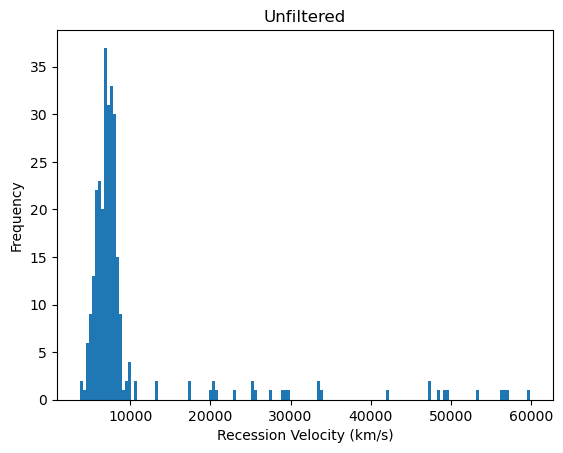

In [149]:


plt.hist(Vhelio_valid, bins = 150)
plt.xlabel("Recession Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("Unfiltered")

plt.savefig("figs/identify_0.png")
plt.show()


In [150]:
upper_lim = 15000 # rough estimate to eliminate clear outliers
Vhelio_sift1 = []
BT_sift1 = []
for i in range(len(Vhelio_valid)):
    if Vhelio_valid[i] < upper_lim:
        Vhelio_sift1.append(Vhelio_valid[i])
        BT_sift1.append(BT_prevalid[i])

Vmean_1 = np.mean(Vhelio_sift1)
Vstd_1 = np.std(Vhelio_sift1)

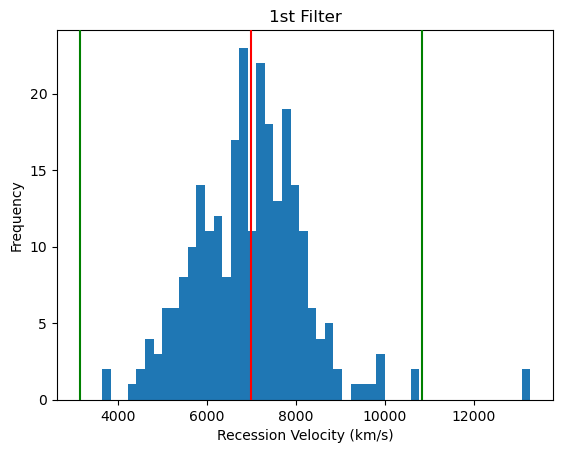

In [151]:
plt.hist(Vhelio_sift1, bins=50)
plt.axvline(Vmean_1, c="red", zorder=5)
plt.axvline(Vmean_1+3*Vstd_1, c="g", zorder=5)
plt.axvline(Vmean_1-3*Vstd_1, c="g", zorder=5)
plt.xlabel("Recession Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("1st Filter")

plt.savefig("figs/identify_1.png")
plt.show()

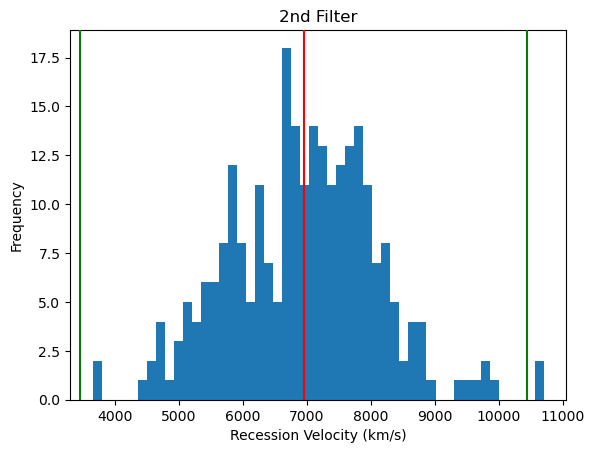

In [152]:
Vhelio_sift2 = []
BT_sift2 = []
for i in range(len(Vhelio_sift1)):
    if (Vhelio_sift1[i] > Vmean_1-3*Vstd_1) and (Vhelio_sift1[i] < Vmean_1+3*Vstd_1) :
        Vhelio_sift2.append(Vhelio_sift1[i])
        BT_sift2.append(BT_sift1[i])

Vmean_2 = np.mean(Vhelio_sift2)
Vstd_2 = np.std(Vhelio_sift2)
plt.hist(Vhelio_sift2, bins=50)
plt.axvline(Vmean_2, c="red", zorder=5)
plt.axvline(Vmean_2+3*Vstd_2, c="g", zorder=5)
plt.axvline(Vmean_2-3*Vstd_2, c="g", zorder=5)
plt.xlabel("Recession Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("2nd Filter")

plt.savefig("figs/identify_2.png")
plt.show()

In [153]:
Vhelio_std = Vstd_2
Vhelio_mean = Vmean_2
V_dispersion = Vhelio_std # standard distribution but in km/s

## Estimating dispersion velocity uncertainty

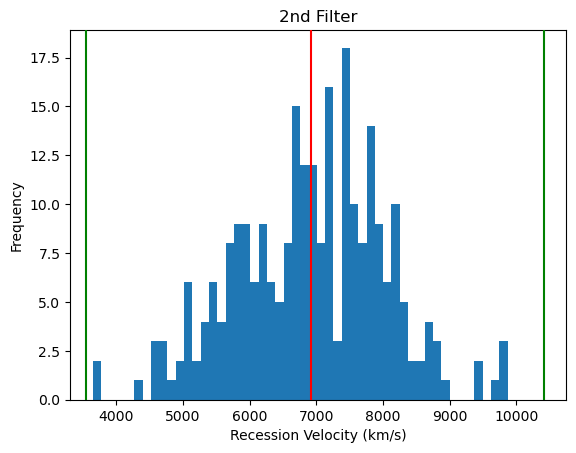

1164.6338147611923
Velocity dispersion uncertainty: 42.5 km/s


In [154]:
Vhelio_sift3 = []
for i in range(len(Vhelio_sift2)):
    if (Vhelio_sift2[i] > Vmean_2-3*Vstd_2) and (Vhelio_sift2[i] < Vmean_2+3*Vstd_2) :
        Vhelio_sift3.append(Vhelio_sift2[i])

Vmean_3 = np.mean(Vhelio_sift3)
Vstd_3 = np.std(Vhelio_sift3)
plt.hist(Vhelio_sift3, bins=50)
plt.axvline(Vmean_3, c="red", zorder=5)
plt.axvline(Vmean_3+3*Vstd_2, c="g", zorder=5)
plt.axvline(Vmean_3-3*Vstd_3, c="g", zorder=5)
plt.xlabel("Recession Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("2nd Filter")

plt.savefig("figs/identify_2.png")
plt.show()

# removing the galaxies on the outer skirts, how does that change velocity dispersion
print(f"{V_dispersion}")
uncertain_V_dispersion = np.abs(V_dispersion - Vstd_3)
print(f"Velocity dispersion uncertainty: {uncertain_V_dispersion:.3} km/s")

seems good

## 1. Estimating Gravitation Mass

In [155]:
print(csts.parsec)

3.085677581491367e+16


In [156]:


print("We estimate the cluster velocity as the mean of the recession velocities of the cluster members\n")
print(f"V_cluster = {Vhelio_mean:.3}±{Vhelio_std:.2} km/s")
print(f"V_dispersion = {V_dispersion:.3} km/s")

# approximate calculation of gravitational mass of COMA cluster using Virial equilibrium
R = 3e6 * csts.parsec # 3 Mpc in m
#print(csts.parsec)
#print(csts.G)


M_vir = 2*R*(V_dispersion*1000)**2 / csts.G # need to convert v_dispersion to m/s
print(f"Virial mass = {M_vir:.3} kg")

Mass_sun = 2e30 # kg
M_vir_solar = M_vir/Mass_sun
print(f"Virial mass = {M_vir:.3} kg")
print(f"Virial mass (in solar units) = {M_vir_solar:.3}")

We estimate the cluster velocity as the mean of the recession velocities of the cluster members

V_cluster = 6.94e+03±1.2e+03 km/s
V_dispersion = 1.16e+03 km/s
Virial mass = 3.76e+45 kg
Virial mass = 3.76e+45 kg
Virial mass (in solar units) = 1.88e+15


In [157]:
H0 = 70 # (km/s)/Mpc added recession velocity per Mpc
D_Mpc = Vhelio_mean/H0
print(f"Used value for Hubble's constant H0 = {H0} (km/s)/Mpc")
print(f"D (cluster distance) = {D_Mpc:.3} Mpc")

Used value for Hubble's constant H0 = 70 (km/s)/Mpc
D (cluster distance) = 99.2 Mpc


### d) Estimate the total stellar luminosity using the blue band apparent magnitudes. The absolute magnitude of the sun is MB = 5.48

In [158]:
BT_valid = []
for i in range(len(BT_sift2)):
    if BT_sift2[i] == None:
        continue
    BT_valid.append(BT_sift2[i])

print(len(BT_sift2), len(BT_valid))

260 257


must first convert apparent magnitude to absolute magnitude

"Since both the absolute magnitude and the luminosity are measures of the true energy output of a star, they should be related. In fact, they obey a logarithmic equation completely analogous to the general equation that we wrote down earlier for magnitudes."

http://csep10.phys.utk.edu/OJTA2dev/ojta/c2c/ordinary_stars/magnitudes/absolute_tl.html

$$M_2 - M_1 = \frac{5}{2}log(L1/L2)$$

$$L1/L2 = 10^{\left(\frac{2}{5}(M_2-M_1)\right)}$$

$M$ are absolute magnitudes
$L$ are luminosities (absolute measure of EM energy per unit time)

Both are intrinsic properties independent of how far away a galaxy is

$L_{sun} = 3.828 \times 10^{26} \textrm{ W}$
In the Visual Band (V band)
$M_{V, sun} = +4.83$
In the Blue Band (B band - the one we have data on)
$M_{B, sun} = +5.48$

source: https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html


Knowing M_sun and L_sun, we can find L for each galaxy in the cluster

We compute the absolute magnitudes using D_Mpc, the distance of the COMA cluster, we don't consider the distances of the individual galaxies (the size of the cluster is much smaller than it's distance to us)

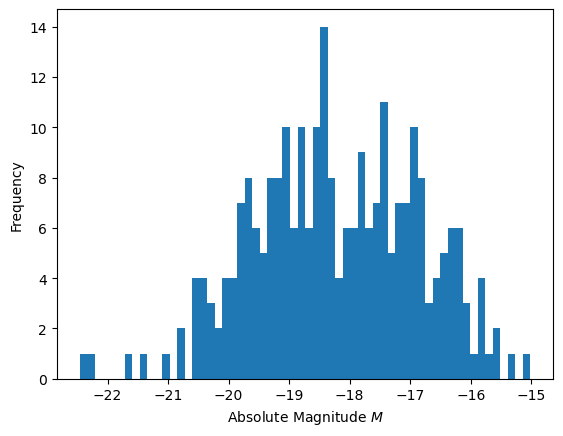

In [165]:
Mag_cluster = BT_valid + (5 - 5*np.log10(D_Mpc*1e6))*np.ones(len(BT_valid))

plt.hist(Mag_cluster, bins=60)
plt.ylabel("Frequency")
plt.xlabel("Absolute Magnitude $M$")

plt.savefig("figs/abs_mag.png")
plt.show()



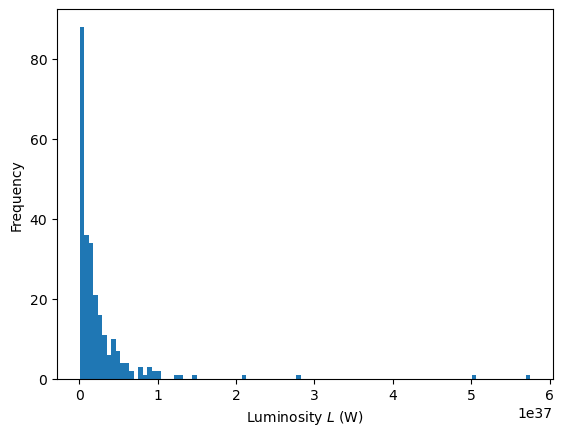

In [160]:
L_sun = 3.828e26 # W
Mag_sun = 5.48 # in the blue band

L_cluster = L_sun*10**(0.4*(Mag_sun - Mag_cluster))
plt.hist(L_cluster, bins=100)
plt.ylabel("Frequency")
plt.xlabel("Luminosity $L$ (W)")
plt.show()

In [161]:
L_cluster_total = np.sum(L_cluster)
print(f"Total stellar luminosity = {L_cluster_total:.3} W")

L_cluster_solar = L_cluster_total/L_sun 

print(f"Total stellar luminosity (in solar units) = {L_cluster_solar:.3}")
print(f"If the COMA cluster was entirely composed of Sun-like stars, we would expect its mass to be : {L_cluster_solar*Mass_sun:.3} kg")

Total stellar luminosity = 6.86e+38 W
Total stellar luminosity (in solar units) = 1.79e+12
If the COMA cluster was entirely composed of Sun-like stars, we would expect its mass to be : 3.59e+42 kg


In [164]:
M_L_ratio = M_vir_solar/L_cluster_solar
print(f"Mass luminosity ratio of COMA cluster {M_L_ratio:.4}")

Mass luminosity ratio of COMA cluster 1.049e+03


3 orders of magnitude difference, so clearly the vast majority of the mass is not emitting light, or is emitting far less light than a normal start (taking sun as reference)

In [163]:
m = [1, 450, 1, 1]
M = m[0]
for i in range(len(m)-1) :
    if i <= (len(m)-2) :
        M += m[i+1]-m[i]
print(M)

1
